In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
from sklearn import datasets

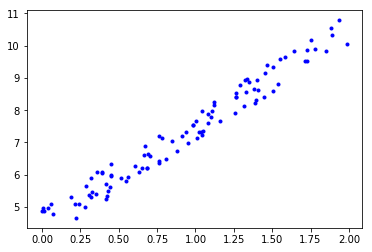

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)
plt.plot(X, y, "b.")

In [3]:
X_b = np.c_[np.ones_like(X), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.50223197],
       [3.0175672 ]])

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones_like(X_new),X_new]
y_predict = X_new_b.dot(theta_best)

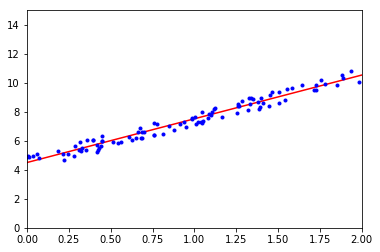

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.50223197]), array([[3.0175672]]))

In [7]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for i in range(n_iterations):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta -= eta * gradient

theta

array([[4.50223197],
       [3.0175672 ]])

In [8]:
n_epoch = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2,1)

for e in range(n_epoch):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index]
        gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(e * m + i)
        theta -= eta * gradient
theta

array([[4.48929862],
       [3.02800969]])

In [9]:
sgd_reg = SGDRegressor(n_iter = 50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [10]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.49878187]), array([3.01635338]))

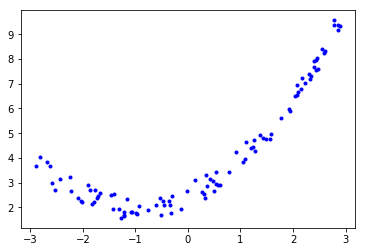

In [11]:
m_poly = 100
X_poly = 6 * np.random.rand(m, 1) - 3
y_poly = 0.5 * X_poly**2 + X_poly + 2 + np.random.rand(m, 1)
plt.plot(X_poly, y_poly, "b.")

In [12]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_pf = poly_features.fit_transform(X_poly)
X_poly[0], X_poly_pf[0]

(array([-1.86422344]), array([-1.86422344,  3.47532904]))

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly_pf, y_poly)
lin_reg.intercept_, lin_reg.coef_

(array([2.41516224]), array([[0.96472149, 0.51177927]]))

In [14]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")

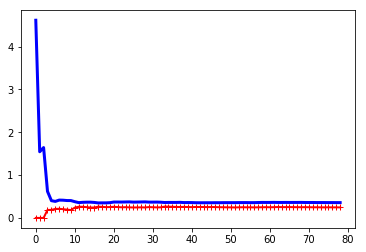

In [15]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_poly_pf, y_poly)

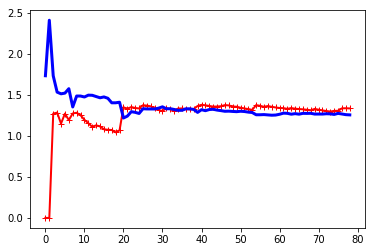

In [16]:
plot_learning_curves(lin_reg, X_poly, y_poly)

(0, 3)

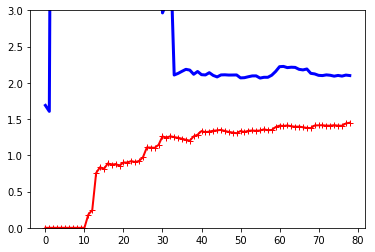

In [17]:
polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
        ("sgd_reg", LinearRegression())))
plot_learning_curves(polynomial_regression, X_poly, y)
plt.ylim([0,3])

(0, 3)

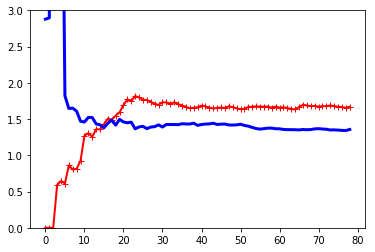

In [18]:
poly_features_10 = PolynomialFeatures(degree = 10, include_bias = False)
X_poly_10 = poly_features.fit_transform(X_poly)
plot_learning_curves(lin_reg, X_poly_10, y)
plt.ylim([0,3])

In [19]:
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X_poly_pf, y_poly)
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
some_X = poly_features.fit_transform([[1.5]])
ridge_reg.predict(some_X)

array([[5.00995669]])

In [20]:
sgd_reg = SGDRegressor(n_iter = 50, penalty = "l2", eta0 = 0.1)
sgd_reg.fit(X_poly_pf, y_poly.ravel())
sgd_reg.predict(some_X)

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


array([4.95436896])

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([2.41621281]), array([0.96531134, 0.48452851]))

In [22]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_poly_pf, y_poly)
lasso_reg.predict(some_X)

array([4.98279495])

In [23]:
elastic_reg = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_reg.fit(X_poly_pf, y_poly)
elastic_reg.predict(some_X)

array([4.97992558])

In [69]:
sgd_reg_es = SGDRegressor(n_iter = 1, warm_start = True, penalty = None, learning_rate = "constant", eta0 = 0.001)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
val_error_vect, train_error_vect = [], []
X_train_poly, X_val_poly, y_train, y_val = train_test_split(X_poly_pf, y_poly, test_size = 0.2)
for e in range(1000):
    sgd_reg_es.fit(X_train_poly, y_train.ravel())
    y_val_predict = sgd_reg_es.predict(X_val_poly)
    val_error = mean_squared_error(y_val_predict, y_val)
    val_error_vect.append(val_error)
    y_train_predict = sgd_reg_es.predict(X_train_poly)
    train_error_vect.append(mean_squared_error(y_train_predict, y_train))
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = e
        best_model = clone(sgd_reg_es)

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. 

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. 

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. 

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. 

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. 

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. 

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. 

In [71]:
best_model.fit(X_poly_pf, y_poly.ravel())
best_model.predict(some_X)

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


array([2.49094668])

In [65]:
minimum_val_error, best_epoch

(0.07431836261884409, 309)

(0.2, 0.5)

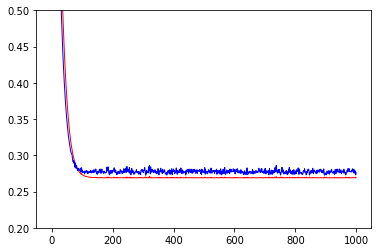

In [68]:
plt.plot(np.sqrt(train_error_vect), "r-", linewidth = 1, label = "train")
plt.plot(np.sqrt(val_error_vect), "b-", linewidth = 1, label = "val")
plt.ylim([0.2,0.5])

In [82]:
iris = datasets.load_iris()
list(iris.keys())
X_iris = iris['data'][:,3:]
y_iris = (iris['target'] == 2).astype(np.int)

In [80]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [85]:
log_reg = LogisticRegression()
log_reg.fit(X_iris, y_iris)

c:\users\quentin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

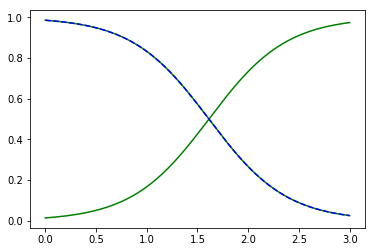

In [95]:
X_iris_new = np.linspace(0,3,1000).reshape(-1,1)
y_iris_proba = log_reg.predict_proba(X_iris_new)
plt.plot(X_iris_new, y_iris_proba, "g-")
plt.plot(X_iris_new, y_iris_proba[:,0], "b--")

In [96]:
X_iris = iris["data"][:, (2,3)]
y_iris = iris["target"]
softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(X_iris, y_iris)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [97]:
softmax_reg.predict([[5,2]]),softmax_reg.predict_proba([[5,2]])

(array([2]), array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]]))